In [ ]:
import os
from dotenv import load_dotenv
load_dotenv()

# Setting the comet variables for the project
comet_api_key =  os.getenv("COMET_API_KEY")
comet_project_name = os.getenv("COMET_PROJECT_NAME")
comet_workspace_name = os.getenv("COMET_WORKSPACE_NAME")

In [ ]:
# Integrating comet to track results
from comet_ml import Experiment
experiment = Experiment(
  api_key=comet_api_key,
  project_name=comet_project_name,
  workspace=comet_workspace_name,
  auto_metric_logging=True,
  auto_param_logging=True,
  auto_histogram_weight_logging=True,
  auto_histogram_gradient_logging=True,
  auto_histogram_activation_logging=True,
  auto_histogram_epoch_rate=True,
  log_code=True
)

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50V2 as ResNet # Resnet50v2 is computationally more efficient and stable than Resnet
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.metrics import Precision, Recall, AUC
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# tf.compat.v1.enable_eager_execution()

!pip install pillow

In [4]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [8]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [10]:
# tf.compat.v1.disable_eager_execution()
# sess = tf.compat.v1.Session()
# session = tf.compact.v1.Session()

In [9]:
train_datagen = ImageDataGenerator(rescale = 1./255, validation_split = 0.2)

valid_datagen = ImageDataGenerator(rescale = 1./255, validation_split = 0.2)

test_datagen  = ImageDataGenerator(rescale = 1./255)

train_dataset  = train_datagen.flow_from_directory(directory = 'c:/users/saini/onedrive/documents/masters/first semester/machine learning/datasets/fer2013/train',
                                                   target_size = (48,48),
                                                   class_mode = 'categorical',
                                                   subset = 'training',
                                                   batch_size = 64)

valid_dataset = valid_datagen.flow_from_directory(directory = 'c:/users/saini/onedrive/documents/masters/first semester/machine learning/datasets/fer2013/train',
                                                  target_size = (48,48),
                                                  class_mode = 'categorical',
                                                  subset = 'validation',
                                                  batch_size = 64)

test_dataset = test_datagen.flow_from_directory(directory = 'c:/users/saini/onedrive/documents/masters/first semester/machine learning/datasets/fer2013/test',
                                                  target_size = (48,48),
                                                  class_mode = 'categorical',
                                                  batch_size = 64)



Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [4]:
# Defining our model architecture
base_model_1 = ResNet(include_top=False, weights='imagenet', input_shape=(48, 48, 3))

x = base_model_1.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)

predictions = Dense(7, activation='softmax')(x)
model_1 = Model(inputs=base_model_1.input, outputs=predictions)

for layer in base_model_1.layers:
    layer.trainable = False

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model_1.compile(optimizer=Adam(learning_rate=0.001), run_eagerly=True, loss='categorical_crossentropy', metrics=['accuracy', Precision(name='precision'), Recall(name='recall'), AUC(name='auc')])

In [5]:
# Training our model
with tf.device('/GPU:0'):
    result_2 = model_1.fit(train_dataset, epochs=60, validation_data=valid_dataset, callbacks=[early_stopping])

Epoch 1/60
359/359 [==============================] - 332s 909ms/step - loss: 1.8425 - accuracy: 0.3146 - precision: 0.4275 - recall: 0.0832 - auc: 0.7032 - val_loss: 1.6108 - val_accuracy: 0.3775 - val_precision: 0.6420 - val_recall: 0.0800 - val_auc: 0.7609
Epoch 2/60
359/359 [==============================] - 266s 739ms/step - loss: 1.6109 - accuracy: 0.3723 - precision: 0.5932 - recall: 0.1123 - auc: 0.7602 - val_loss: 1.5858 - val_accuracy: 0.3769 - val_precision: 0.5978 - val_recall: 0.1251 - val_auc: 0.7697
Epoch 3/60
359/359 [==============================] - 269s 749ms/step - loss: 1.5491 - accuracy: 0.4019 - precision: 0.6198 - recall: 0.1482 - auc: 0.7819 - val_loss: 1.5829 - val_accuracy: 0.3860 - val_precision: 0.6105 - val_recall: 0.1237 - val_auc: 0.7701
Epoch 4/60
359/359 [==============================] - 281s 784ms/step - loss: 1.5044 - accuracy: 0.4230 - precision: 0.6488 - recall: 0.1759 - auc: 0.7963 - val_loss: 1.5673 - val_accuracy: 0.3917 - val_precision: 0.6409

In [6]:
result_2.history

{'loss': [1.842544674873352,
  1.6109148263931274,
  1.5490833520889282,
  1.5044360160827637,
  1.4505703449249268,
  1.4094631671905518,
  1.3661220073699951,
  1.33054518699646,
  1.289231300354004],
 'accuracy': [0.31461164355278015,
  0.3723005950450897,
  0.4019069969654083,
  0.4230233430862427,
  0.4431382715702057,
  0.4612068831920624,
  0.4831504821777344,
  0.4961685836315155,
  0.5151950716972351],
 'precision': [0.4274536073207855,
  0.5932398438453674,
  0.6198106408119202,
  0.6488439440727234,
  0.6714552640914917,
  0.6836654543876648,
  0.6952850222587585,
  0.7079883813858032,
  0.7294396758079529],
 'recall': [0.08324625343084335,
  0.11233019828796387,
  0.1482062041759491,
  0.17594043910503387,
  0.20350052416324615,
  0.22705502808094025,
  0.25809821486473083,
  0.27551376819610596,
  0.3077760338783264],
 'auc': [0.7032438516616821,
  0.7602010369300842,
  0.7819014191627502,
  0.7963150143623352,
  0.8123502731323242,
  0.8241921663284302,
  0.83627277612686

In [16]:
# plot_graph(result_2)

In [9]:
model_1.save('resnet_v1.h5')

In [7]:
model_1 = load_model('resnet_v1.h5')

In [10]:
images, labels = next(test_dataset)

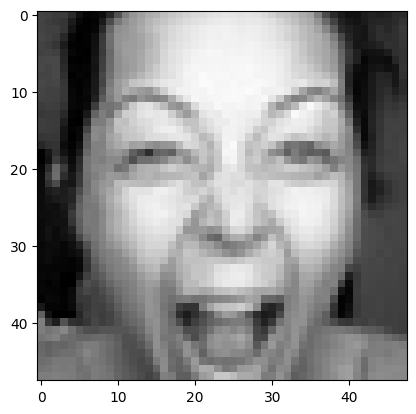

In [11]:
import matplotlib.pyplot as plt
plt.imshow(images[4])

In [13]:
class_indexes = train_dataset.class_indices
class_indexes

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [14]:
images[0].shape

(48, 48, 3)

In [15]:
image_0 = images[9].reshape((1, 48, 48, 3))
image_0.shape

(1, 48, 48, 3)

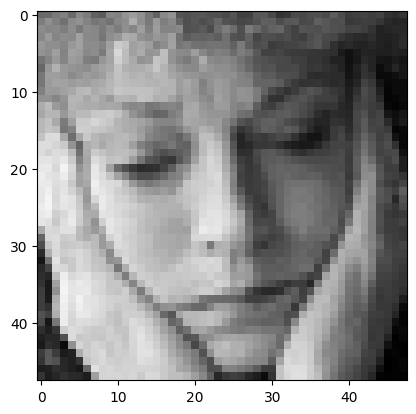

In [16]:
plt.imshow(images[9])

In [17]:
# Computing class label for the images 
# This will tell us which class our image belongs to
def compute_label(label_array, class_indexes):
    predicted_class_index = np.argmax(label_array)
    predicted_class = list(class_indexes.keys())[predicted_class_index]
    return predicted_class

## Checking the predictions of our model

1/1 [==============================] - 0s 170ms/step


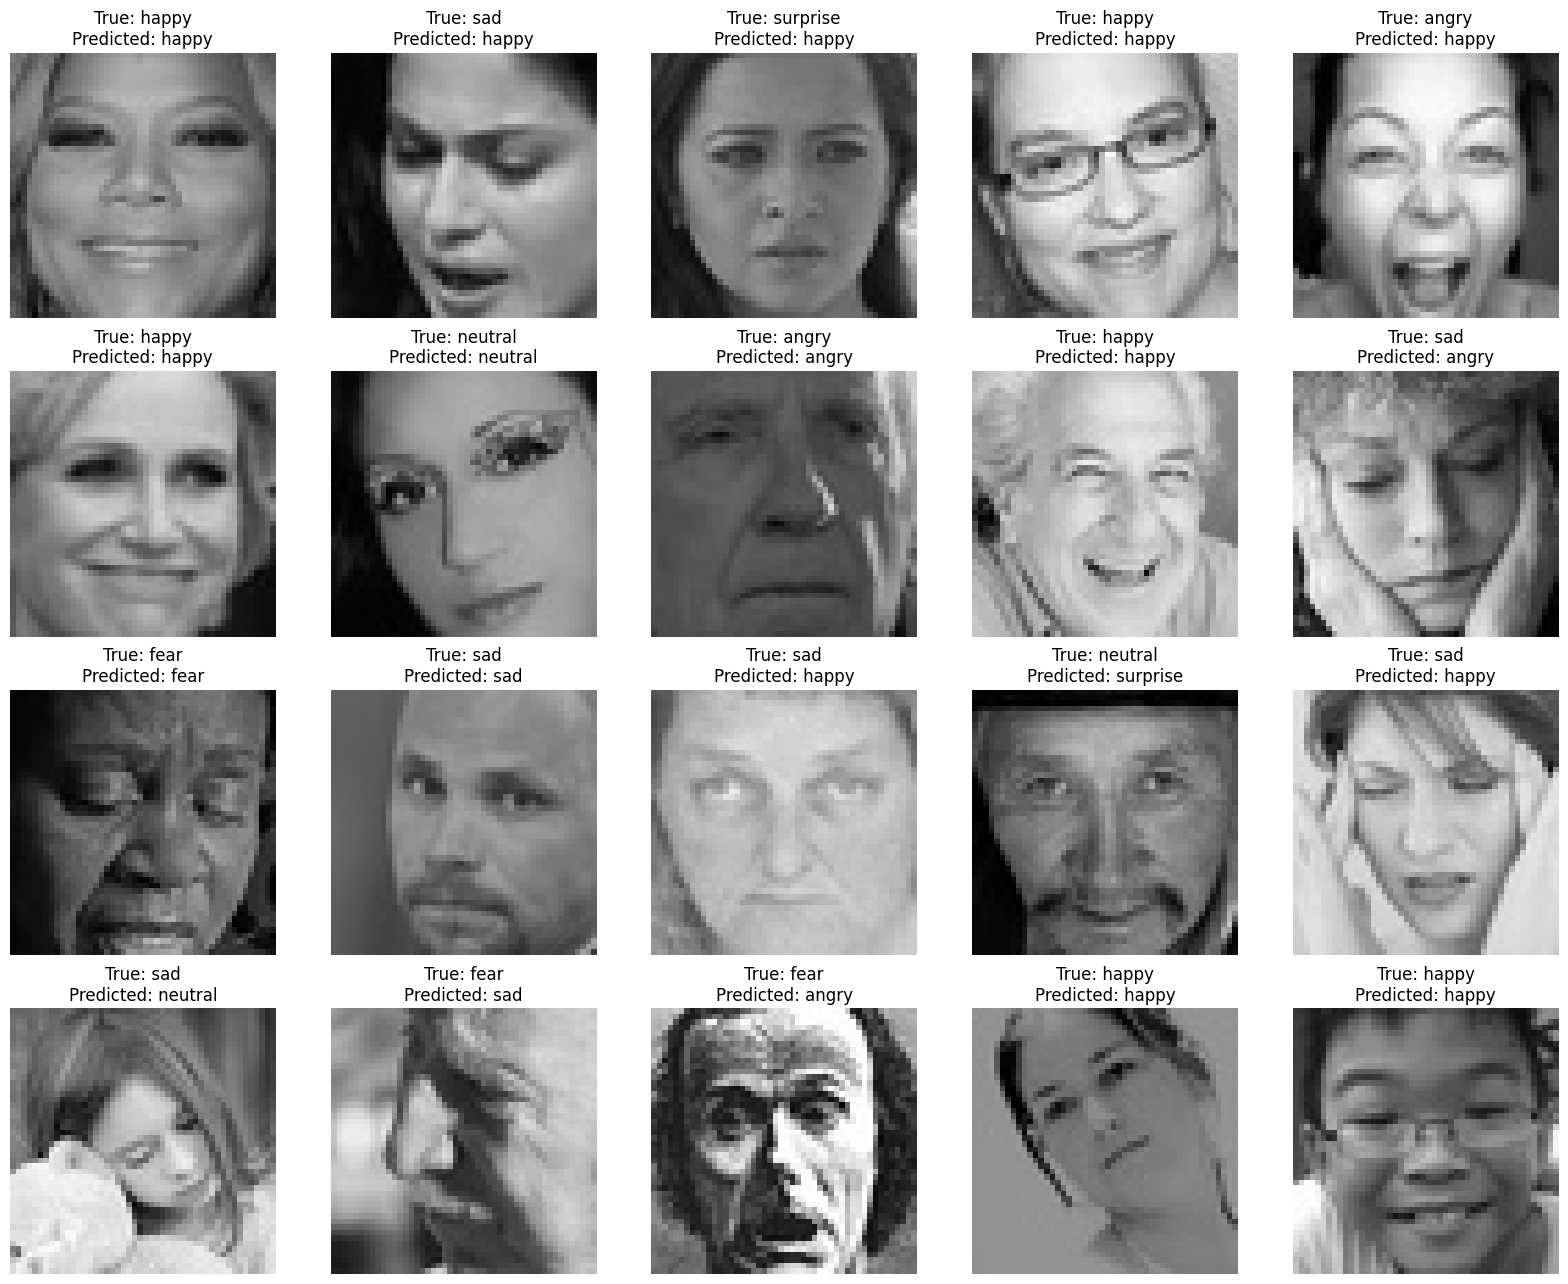

In [29]:
# Plotting some predictions of our model
plt.figure(figsize=(20, 20))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.axis('off')
    true_label = compute_label(labels[i], class_indexes)
    predicted_label = compute_label(model_1.predict(images[i].reshape((1, 48, 48, 3))), class_indexes)
    title = f"True: {true_label}\nPredicted: {predicted_label}"
    plt.title(title)

1/1 [==============================] - 0s 276ms/step


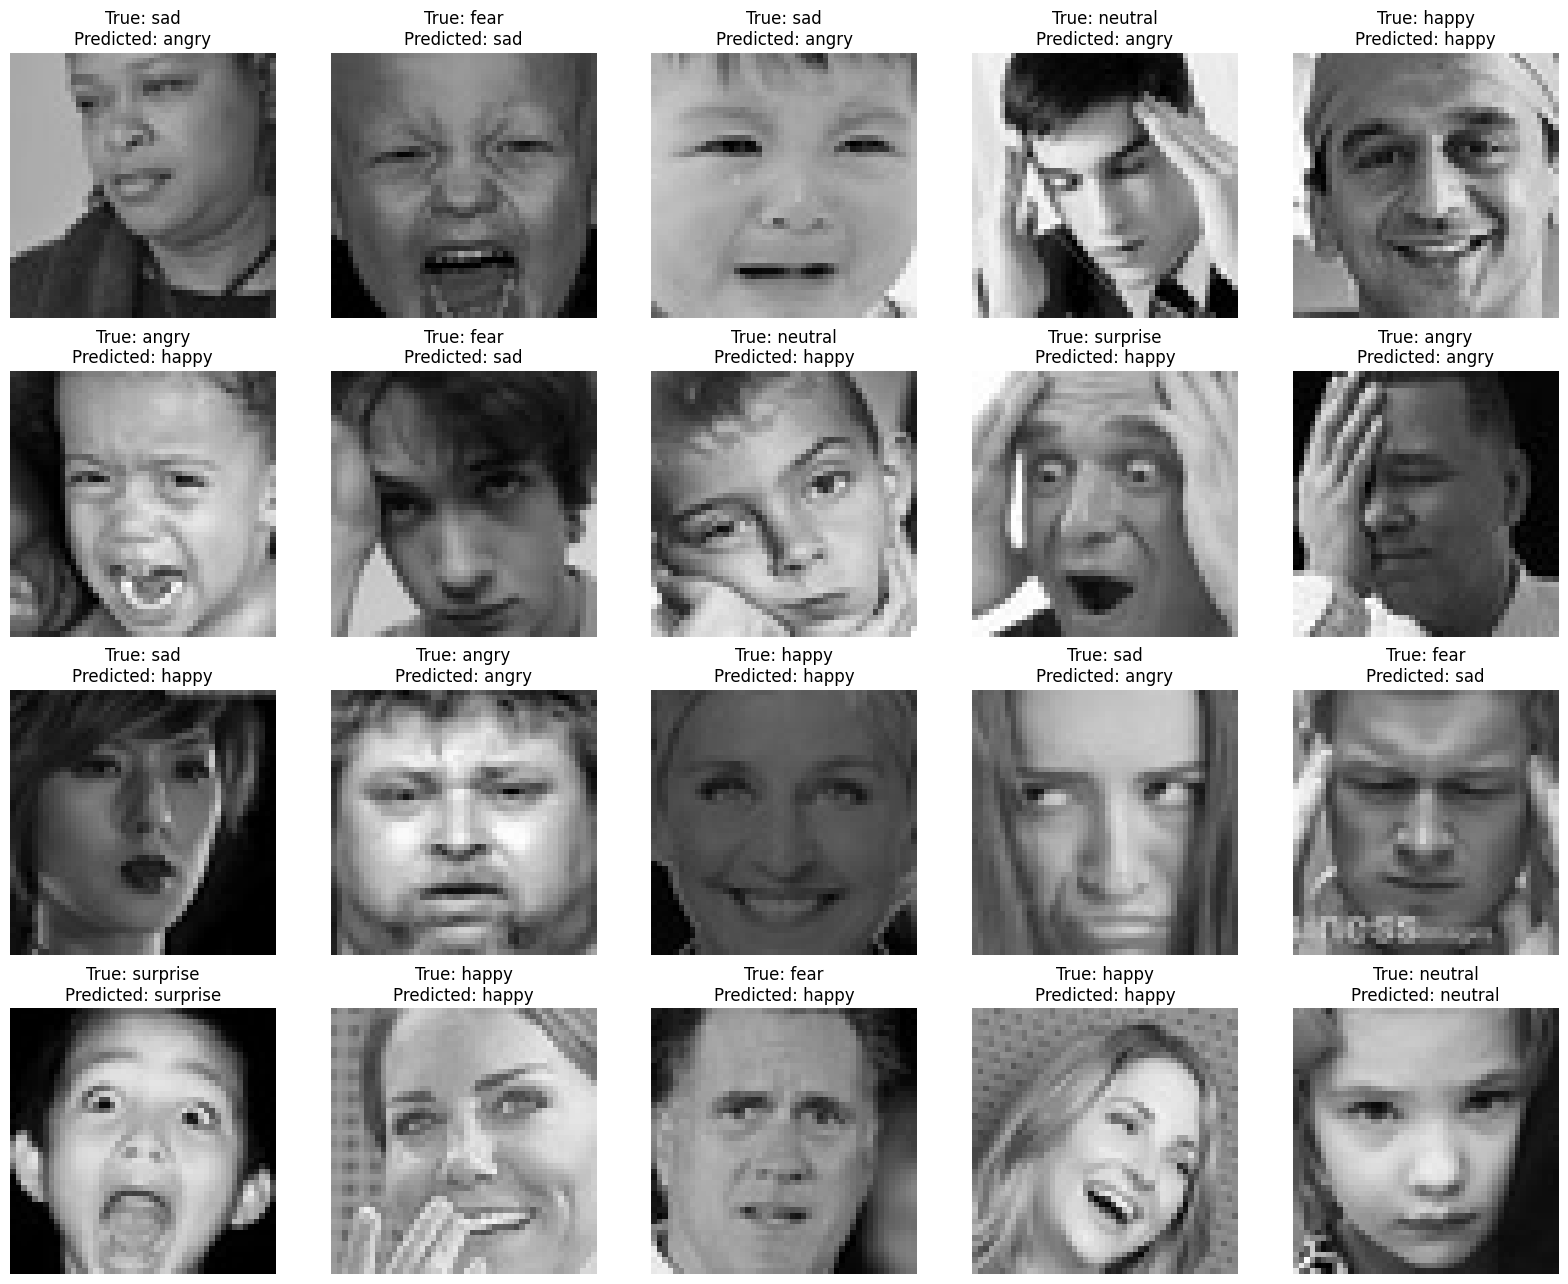

In [35]:
plt.figure(figsize=(20, 20))
j = 1
for i in range(21,41):
    plt.subplot(5,5,j)
    j=j+1
    plt.imshow(images[i], cmap='gray')
    plt.axis('off')
    true_label = compute_label(labels[i], class_indexes)
    predicted_label = compute_label(model_1.predict(images[i].reshape((1, 48, 48, 3))), class_indexes)
    title = f"True: {true_label}\nPredicted: {predicted_label}"
    plt.title(title)

1/1 [==============================] - 0s 123ms/step


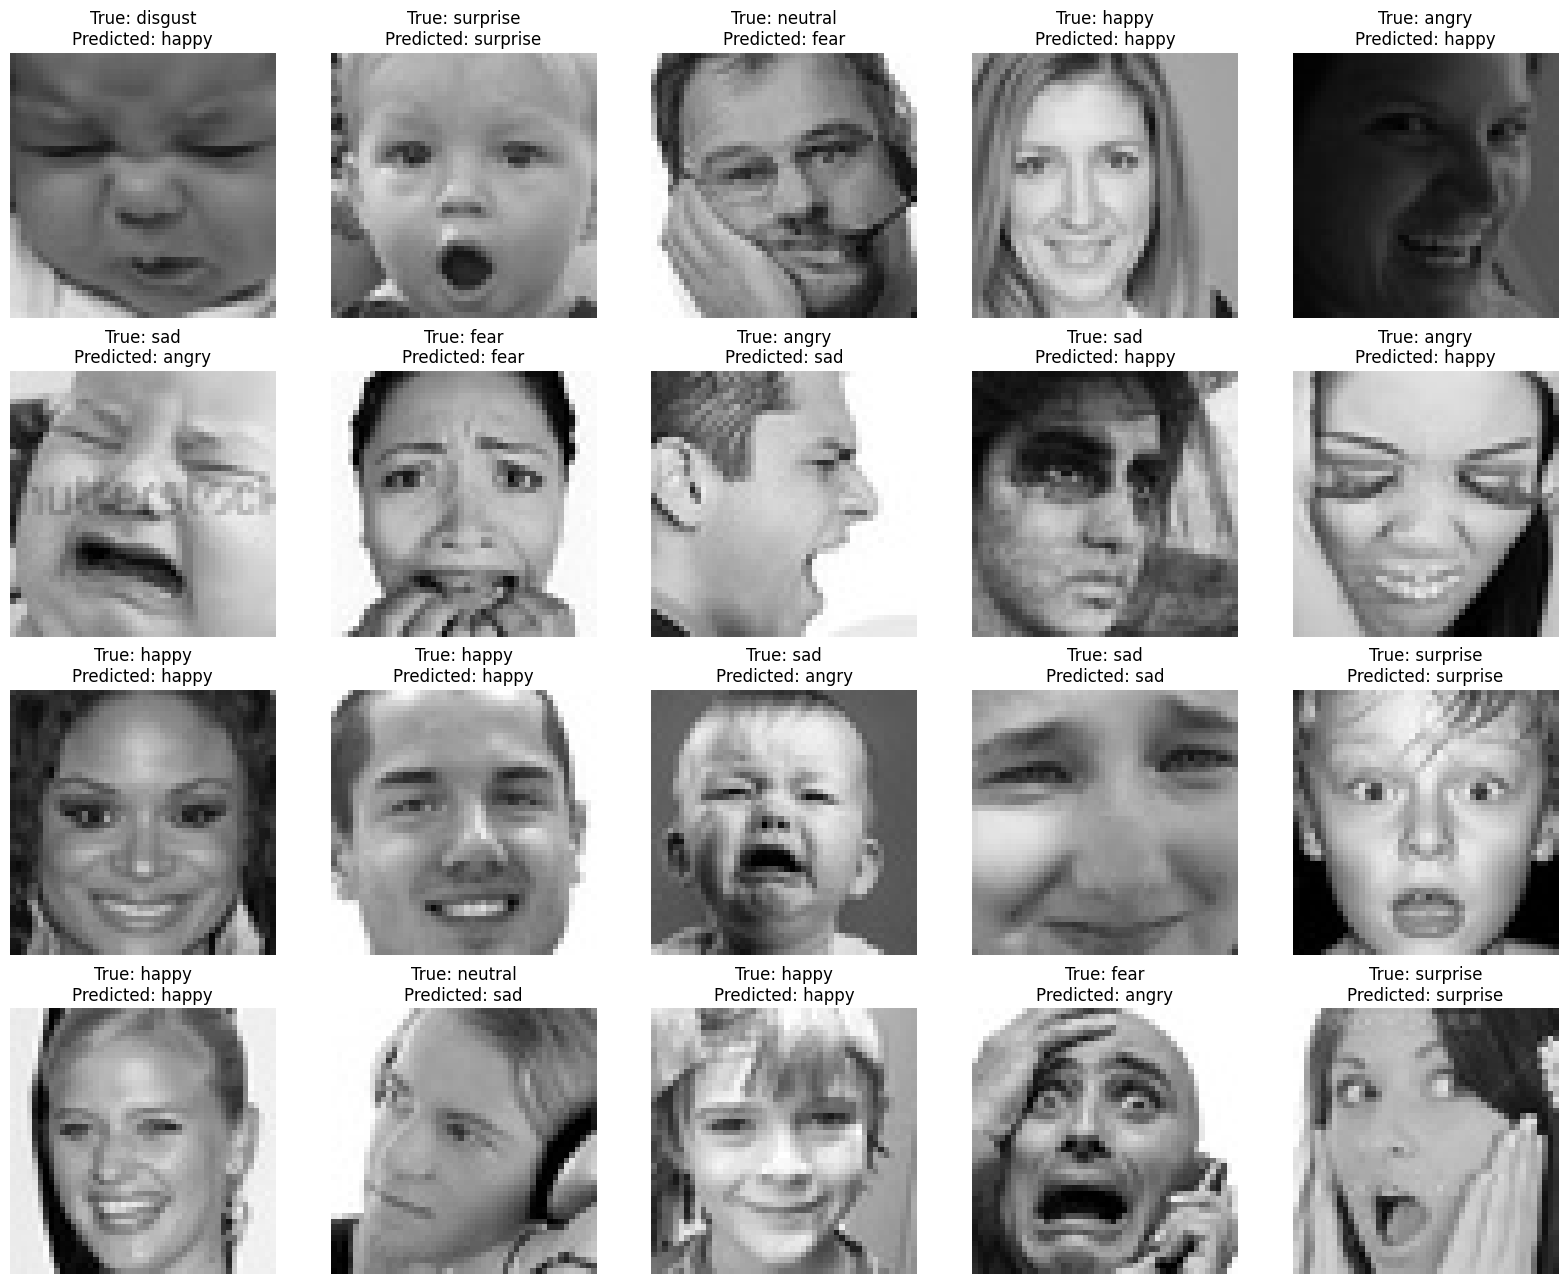

In [36]:
plt.figure(figsize=(20, 20))
j = 1
for i in range(41,61):
    plt.subplot(5,5,j)
    j=j+1
    plt.imshow(images[i], cmap='gray')
    plt.axis('off')
    true_label = compute_label(labels[i], class_indexes)
    predicted_label = compute_label(model_1.predict(images[i].reshape((1, 48, 48, 3))), class_indexes)
    title = f"True: {true_label}\nPredicted: {predicted_label}"
    plt.title(title)

In [39]:
second_set_images, second_set_labels = next(test_dataset)

1/1 [==============================] - 0s 122ms/step


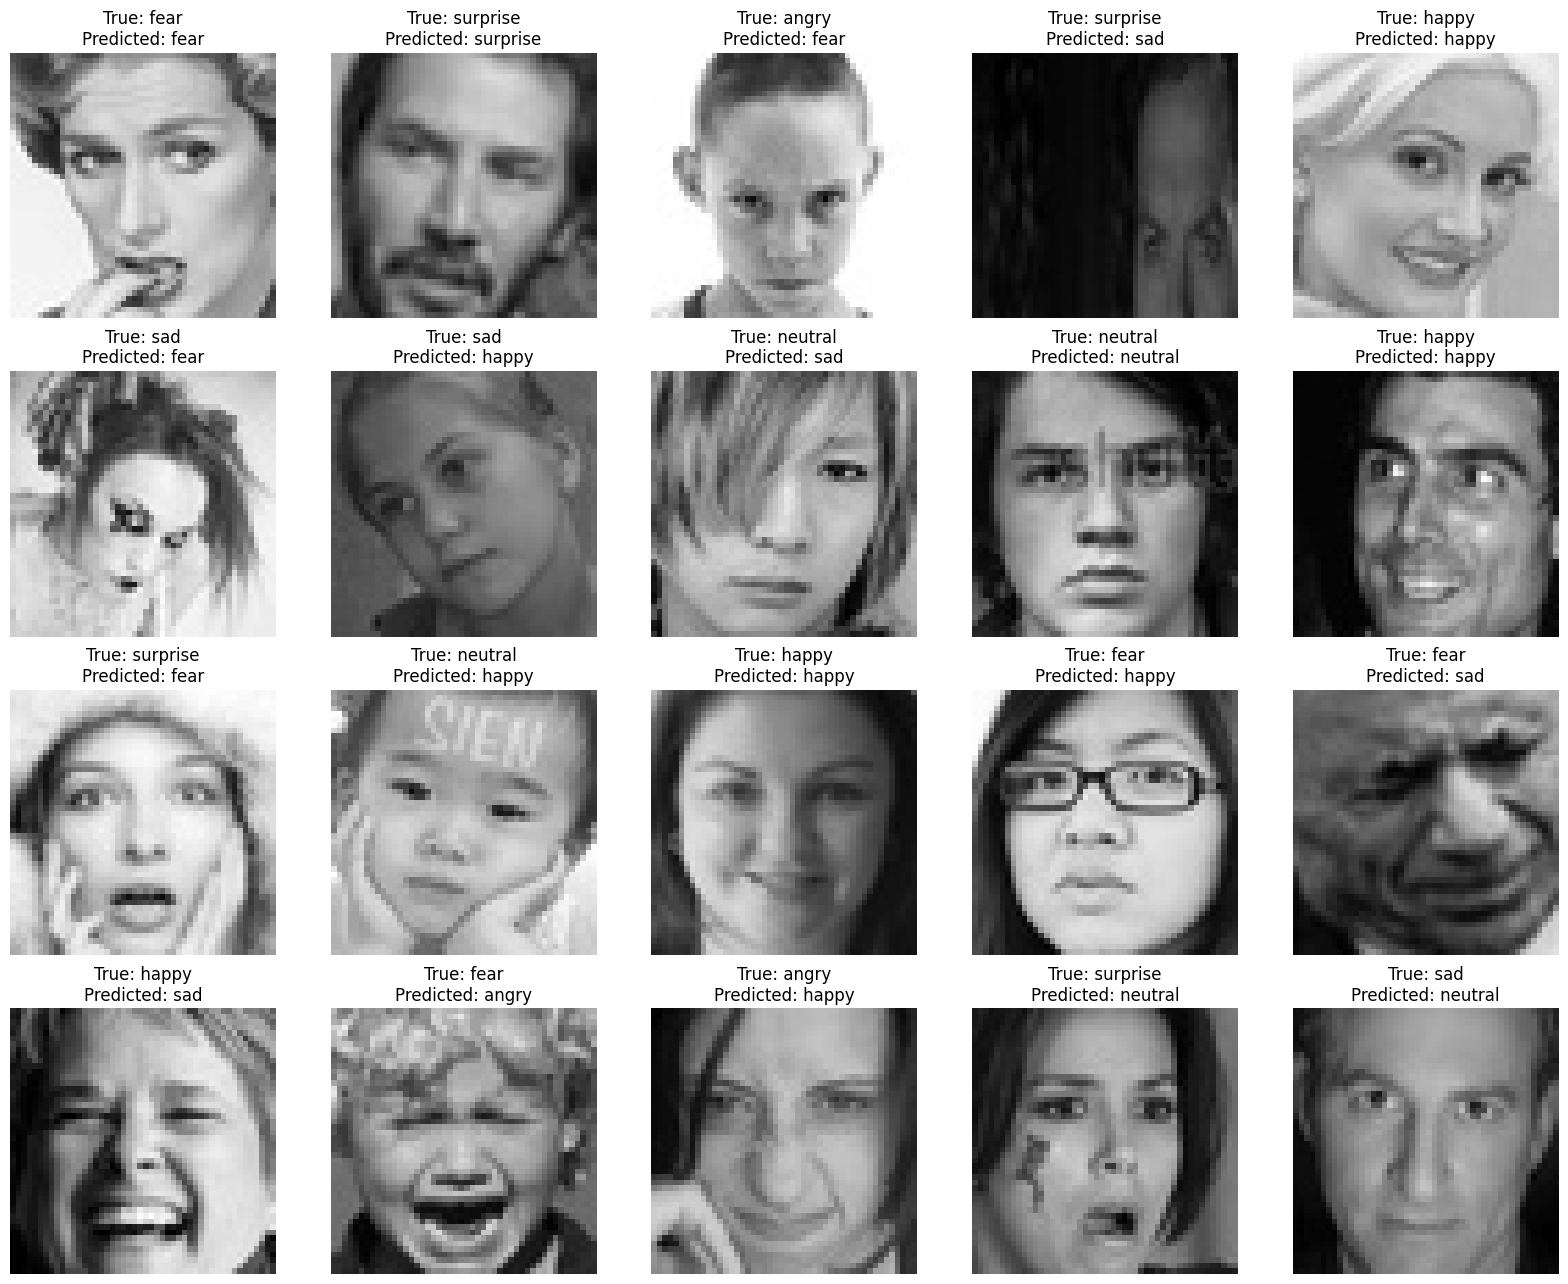

In [41]:
plt.figure(figsize=(20, 20))
j = 1
for i in range(1,21):
    plt.subplot(5,5,j)
    j=j+1
    plt.imshow(second_set_images[i], cmap='gray')
    plt.axis('off')
    true_label = compute_label(second_set_labels[i], class_indexes)
    predicted_label = compute_label(model_1.predict(second_set_images[i].reshape((1, 48, 48, 3))), class_indexes)
    title = f"True: {true_label}\nPredicted: {predicted_label}"
    plt.title(title)

In [70]:
predicted_class_index = np.argmax(model_1.predict(image_0))
predicted_class = list(class_indexes.keys())[predicted_class_index]
print(predicted_class)

1/1 [==============================] - 0s 184ms/step
surprise


In [61]:
labels[8]

array([0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
experiment.end()